# Sports Car Price Prediction: Data Wrangling

This notebook focuses on the data wrangling process for the Sports Car Price Prediction project. In this phase, we will:

1. Load and inspect the raw data
2. Clean the data (handle missing values, remove duplicates, etc.)
3. Transform the data (convert data types, engineer features, etc.)
4. Explore the data (analyze distributions, correlations, etc.)
5. Prepare the data for modeling

The goal of this project is to develop a machine learning model that can predict sports car prices based on various features such as car specifications and performance metrics.

## 1. Import Libraries

First, let's import the necessary libraries for our data wrangling process.

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display

# Configure visualizations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('viridis')

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# For reproducibility
np.random.seed(42)

## 2. Load and Inspect the Raw Data

Next, we'll load the sports car dataset from the CSV file and perform an initial inspection to understand its structure and content.

In [2]:
# Define the path to the raw data file
raw_data_path = "../raw_data/Sport car price.csv"

# Load the data
cars_df = pd.read_csv(raw_data_path)

# Display basic information about the dataset
print(f"Dataset shape: {cars_df.shape}")
print(f"\nNumber of rows: {cars_df.shape[0]}")
print(f"Number of columns: {cars_df.shape[1]}")
print("\nColumn names:")
print(cars_df.columns.tolist())

# Display the first few rows of the data
print("\nFirst 5 rows of the dataset:")
display(cars_df.head())

Dataset shape: (1007, 8)

Number of rows: 1007
Number of columns: 8

Column names:
['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)']

First 5 rows of the dataset:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [3]:
# Check the data types of each column
print("Data Types:")
print(cars_df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(cars_df.isnull().sum())

# Generate summary statistics
print("\nSummary Statistics:")
display(cars_df.describe())

Data Types:
Car Make                   object
Car Model                  object
Year                        int64
Engine Size (L)            object
Horsepower                 object
Torque (lb-ft)             object
0-60 MPH Time (seconds)    object
Price (in USD)             object
dtype: object

Missing Values:
Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

Summary Statistics:


,Year
count,1007.00
mean,2021.20
std,2.02
min,1965.00
25%,2021.00
50%,2021.00
75%,2022.00
max,2023.00


## 3. Data Cleaning

In this section, we'll address any data quality issues such as missing values, duplicates, and inconsistent formatting.

In [4]:
# Check for duplicate records
duplicate_count = cars_df.duplicated().sum()
print(f"Number of duplicate records: {duplicate_count}")

if duplicate_count > 0:
    # Remove duplicates if any exist
    cars_df = cars_df.drop_duplicates().reset_index(drop=True)
    print(f"Duplicates removed. New dataset shape: {cars_df.shape}")
else:
    print("No duplicates found.")

Number of duplicate records: 288
Duplicates removed. New dataset shape: (719, 8)


In [5]:
# Check the format of the Price column
print("Price column sample values:")
print(cars_df['Price (in USD)'].head())

# Clean the Price column by removing commas and converting to numeric
cars_df['Price (in USD)'] = cars_df['Price (in USD)'].replace({'\$': '', ',': ''}, regex=True).astype(float)

print("\nPrice column after cleaning:")
print(cars_df['Price (in USD)'].head())

# Check for any remaining non-numeric values
non_numeric_count = cars_df['Price (in USD)'].apply(lambda x: not np.isreal(x)).sum()
print(f"\nNon-numeric values in Price column after cleaning: {non_numeric_count}")

Price column sample values:
0    101,200
1    274,390
2    333,750
3    142,700
4    298,000
Name: Price (in USD), dtype: object

Price column after cleaning:
0   101200.00
1   274390.00
2   333750.00
3   142700.00
4   298000.00
Name: Price (in USD), dtype: float64

Non-numeric values in Price column after cleaning: 0


Numerical columns for outlier detection: ['Year', 'Price (in USD)']


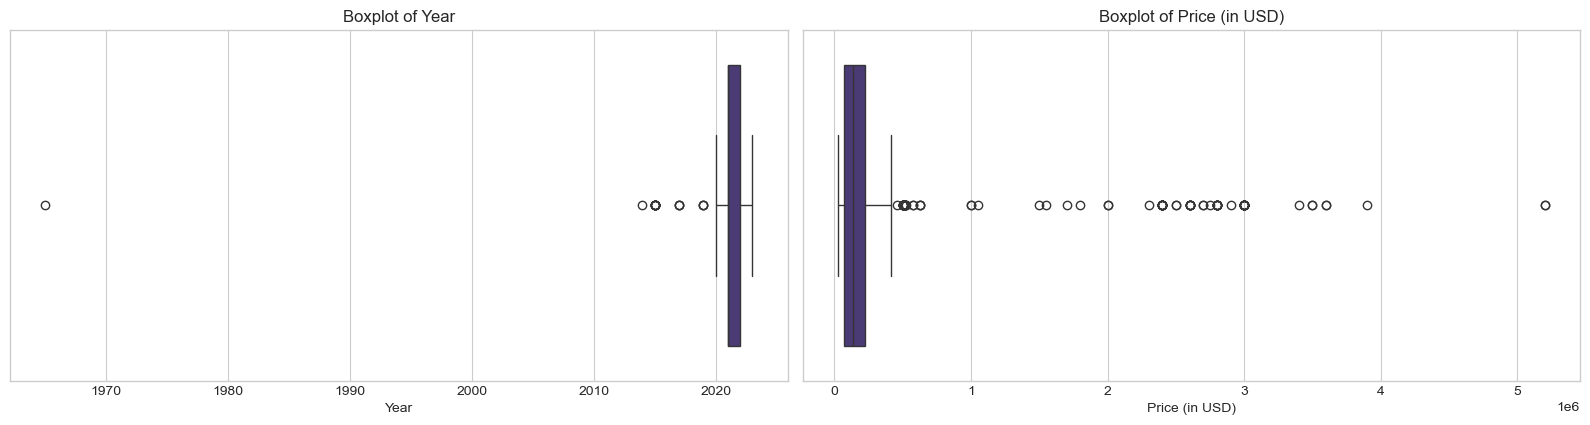


Potential outliers (Z-score > 3):

Year: 2 potential outliers
     Year
154  1965
236  2014

Price (in USD): 33 potential outliers
    Price (in USD)
11      3000000.00
14      2800000.00
24      2800000.00
83      3000000.00
86      3000000.00


In [6]:
# Identify numerical columns for outlier detection
numerical_cols = cars_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns for outlier detection: {numerical_cols}")

# Create box plots to visualize outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=cars_df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

# Calculate Z-scores to identify potential outliers
from scipy import stats

print("\nPotential outliers (Z-score > 3):")
for col in numerical_cols:
    z_scores = np.abs(stats.zscore(cars_df[col]))
    outliers = cars_df[z_scores > 3]
    if len(outliers) > 0:
        print(f"\n{col}: {len(outliers)} potential outliers")
        print(outliers[[col]].head())

## 4. Data Transformation

In this section, we'll transform the data to make it more suitable for analysis and modeling. This includes converting data types, creating new features, and normalizing/scaling data where appropriate.

In [7]:
# Create a copy of the cleaned DataFrame for transformation
cars_transformed = cars_df.copy()

# Convert relevant columns to numeric, coercing errors to NaN
for col in ['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']:
    cars_transformed[col] = pd.to_numeric(cars_transformed[col], errors='coerce')

# Create a new feature: Power-to-Weight ratio (if weight data is available)
# Since we don't have weight data, we'll create other meaningful features

# Create a feature for car age (relative to 2025)
current_year = 2025  # Using the current year from the context
cars_transformed['Car Age'] = current_year - cars_transformed['Year']

# Create a feature for horsepower per liter (specific output)
cars_transformed['HP per Liter'] = cars_transformed['Horsepower'] / cars_transformed['Engine Size (L)']

# Create a feature for torque-to-horsepower ratio
cars_transformed['Torque to HP Ratio'] = cars_transformed['Torque (lb-ft)'] / cars_transformed['Horsepower']

# Create price categories
price_bins = [0, 75000, 150000, 300000, float('inf')]
price_labels = ['Entry Level', 'Mid Range', 'High End', 'Ultra Luxury']
cars_transformed['Price Category'] = pd.cut(cars_transformed['Price (in USD)'], 
                                           bins=price_bins, 
                                           labels=price_labels)

# Display the transformed DataFrame
print("Transformed DataFrame with new features:")
display(cars_transformed.head())

Transformed DataFrame with new features:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Car Age,HP per Liter,Torque to HP Ratio,Price Category
0,Porsche,911,2022,3.00,379.00,331.00,4.00,101200.00,3,126.33,0.87,Mid Range
1,Lamborghini,Huracan,2021,5.20,630.00,443.00,2.80,274390.00,4,121.15,0.70,High End
2,Ferrari,488 GTB,2022,3.90,661.00,561.00,3.00,333750.00,3,169.49,0.85,Ultra Luxury
3,Audi,R8,2022,5.20,562.00,406.00,3.20,142700.00,3,108.08,0.72,Mid Range
4,McLaren,720S,2021,4.00,710.00,568.00,2.70,298000.00,4,177.50,0.80,High End


In [8]:
# Normalize numerical features for modeling
from sklearn.preprocessing import MinMaxScaler

# Select numerical features to normalize (excluding the target variable and categorical features)
features_to_normalize = ['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', 
                        '0-60 MPH Time (seconds)', 'Car Age', 'HP per Liter', 
                        'Torque to HP Ratio']

# Create a copy for normalized data
cars_normalized = cars_transformed.copy()

# Initialize the scaler
scaler = MinMaxScaler()

# Apply normalization to selected features
cars_normalized[features_to_normalize] = scaler.fit_transform(cars_normalized[features_to_normalize])

# Display the normalized data
print("Normalized features:")
display(cars_normalized[features_to_normalize].head())

Normalized features:


,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Car Age,HP per Liter,Torque to HP Ratio
0,0.36,0.11,0.19,0.47,0.02,0.25,0.49
1,0.62,0.25,0.26,0.21,0.03,0.23,0.27
2,0.46,0.26,0.32,0.26,0.02,0.42,0.46
3,0.62,0.21,0.23,0.30,0.02,0.18,0.30
4,0.48,0.29,0.33,0.19,0.03,0.45,0.40


In [9]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ['Car Make', 'Car Model', 'Price Category']
print(f"Categorical columns: {categorical_cols}")

# Create a copy for encoding
cars_encoded = cars_normalized.copy()

# Initialize encoders for each categorical column
encoders = {}
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    cars_encoded[f'{col}_encoded'] = encoders[col].fit_transform(cars_encoded[col])

# Display the encoded data
print("\nDataFrame with encoded categorical variables:")
display(cars_encoded.head())

Categorical columns: ['Car Make', 'Car Model', 'Price Category']

DataFrame with encoded categorical variables:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Car Age,HP per Liter,Torque to HP Ratio,Price Category,Car Make_encoded,Car Model_encoded,Price Category_encoded
0,Porsche,911,2022,0.36,0.11,0.19,0.47,101200.00,0.02,0.25,0.49,Mid Range,28,18,2
1,Lamborghini,Huracan,2021,0.62,0.25,0.26,0.21,274390.00,0.03,0.23,0.27,High End,16,98,1
2,Ferrari,488 GTB,2022,0.46,0.26,0.32,0.26,333750.00,0.02,0.42,0.46,Ultra Luxury,11,5,3
3,Audi,R8,2022,0.62,0.21,0.23,0.30,142700.00,0.02,0.18,0.30,Mid Range,5,130,2
4,McLaren,720S,2021,0.48,0.29,0.33,0.19,298000.00,0.03,0.45,0.40,High End,21,15,1


## 5. Exploratory Data Analysis

Now that we've cleaned and transformed the data, let's explore it to gain insights about the relationships between different variables and how they might influence car prices.

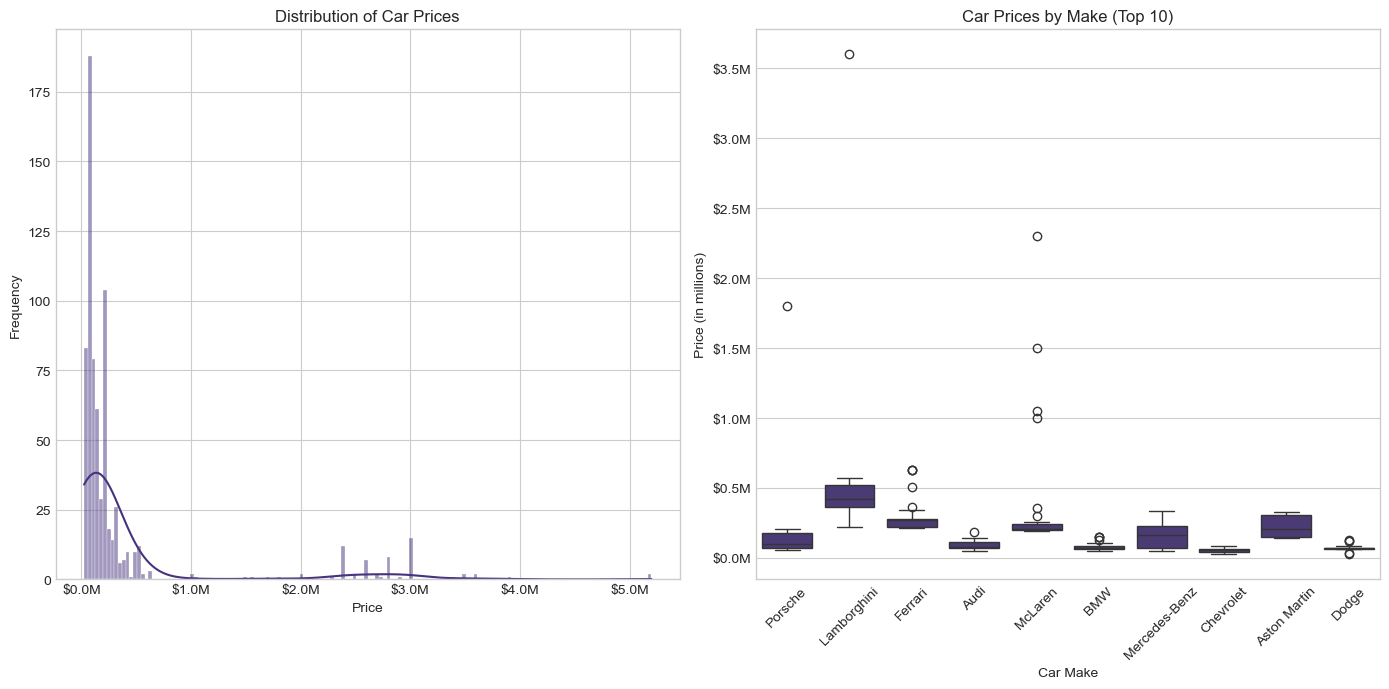

In [10]:
# Make sure plots display in the notebook
%matplotlib inline

# Analyze the distribution of car prices
plt.figure(figsize=(14, 7))

# Format y-axis in millions for better readability
def format_price_in_millions(x, pos):
    return f'${x/1000000:.1f}M'

# Histogram of car prices
plt.subplot(1, 2, 1)
sns.histplot(cars_df['Price (in USD)'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
# Format y-ticks to show prices in millions
from matplotlib.ticker import FuncFormatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_price_in_millions))

# Box plot of car prices by make (top 10 makes by count)
plt.subplot(1, 2, 2)
top_makes = cars_df['Car Make'].value_counts().nlargest(10).index
sns.boxplot(x='Car Make', y='Price (in USD)', data=cars_df[cars_df['Car Make'].isin(top_makes)])
plt.title('Car Prices by Make (Top 10)')
plt.xticks(rotation=45)
plt.xlabel('Car Make')
plt.ylabel('Price (in millions)')
# Format y-ticks to show prices in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price_in_millions))

plt.tight_layout()
plt.show()

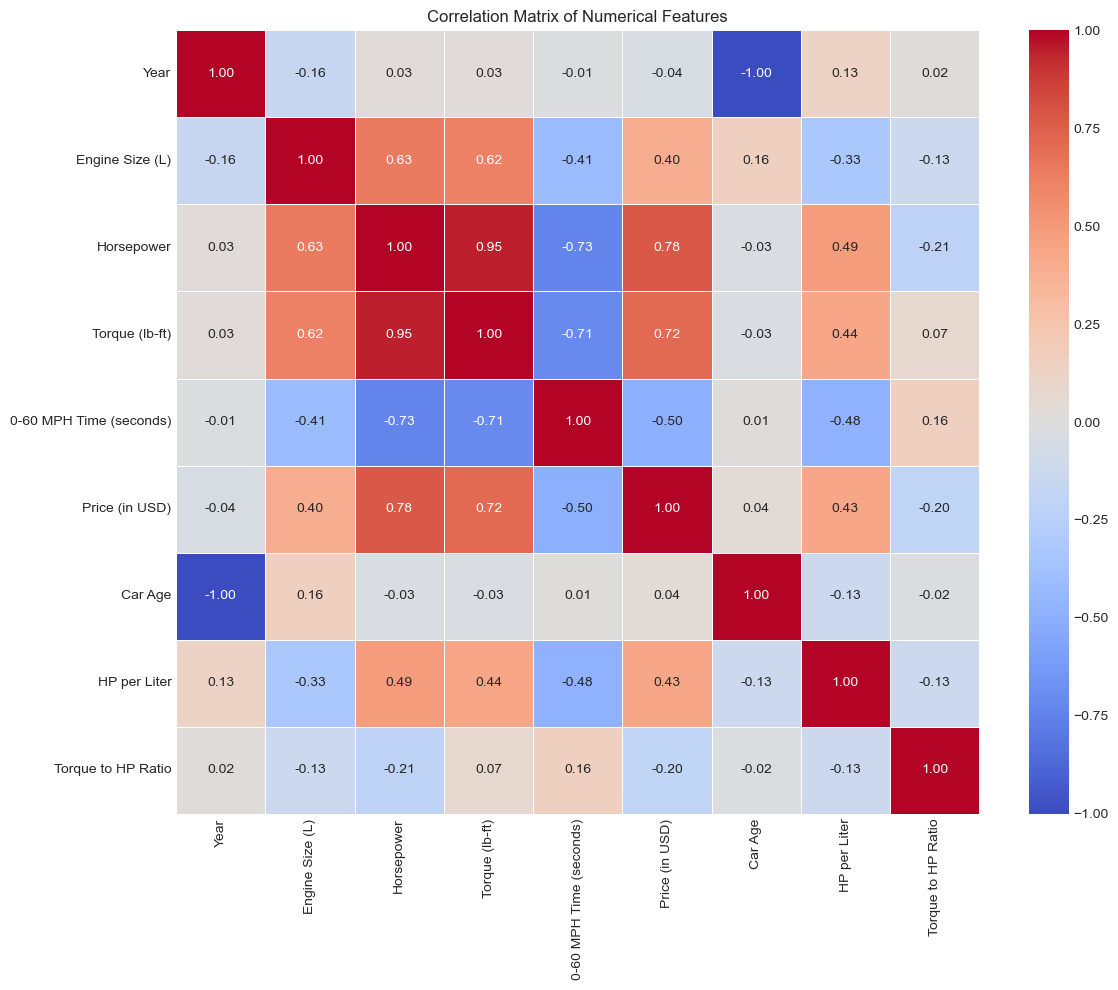

Correlations with Price:
Price (in USD)             1.00
Horsepower                 0.78
Torque (lb-ft)             0.72
HP per Liter               0.43
Engine Size (L)            0.40
Car Age                    0.04
Year                      -0.04
Torque to HP Ratio        -0.20
0-60 MPH Time (seconds)   -0.50
Name: Price (in USD), dtype: float64


In [11]:
# Analyze correlations between numerical features
numerical_features = cars_transformed.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = cars_transformed[numerical_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Examine correlations with the target variable (Price)
price_correlations = correlation_matrix['Price (in USD)'].sort_values(ascending=False)
print("Correlations with Price:")
print(price_correlations)

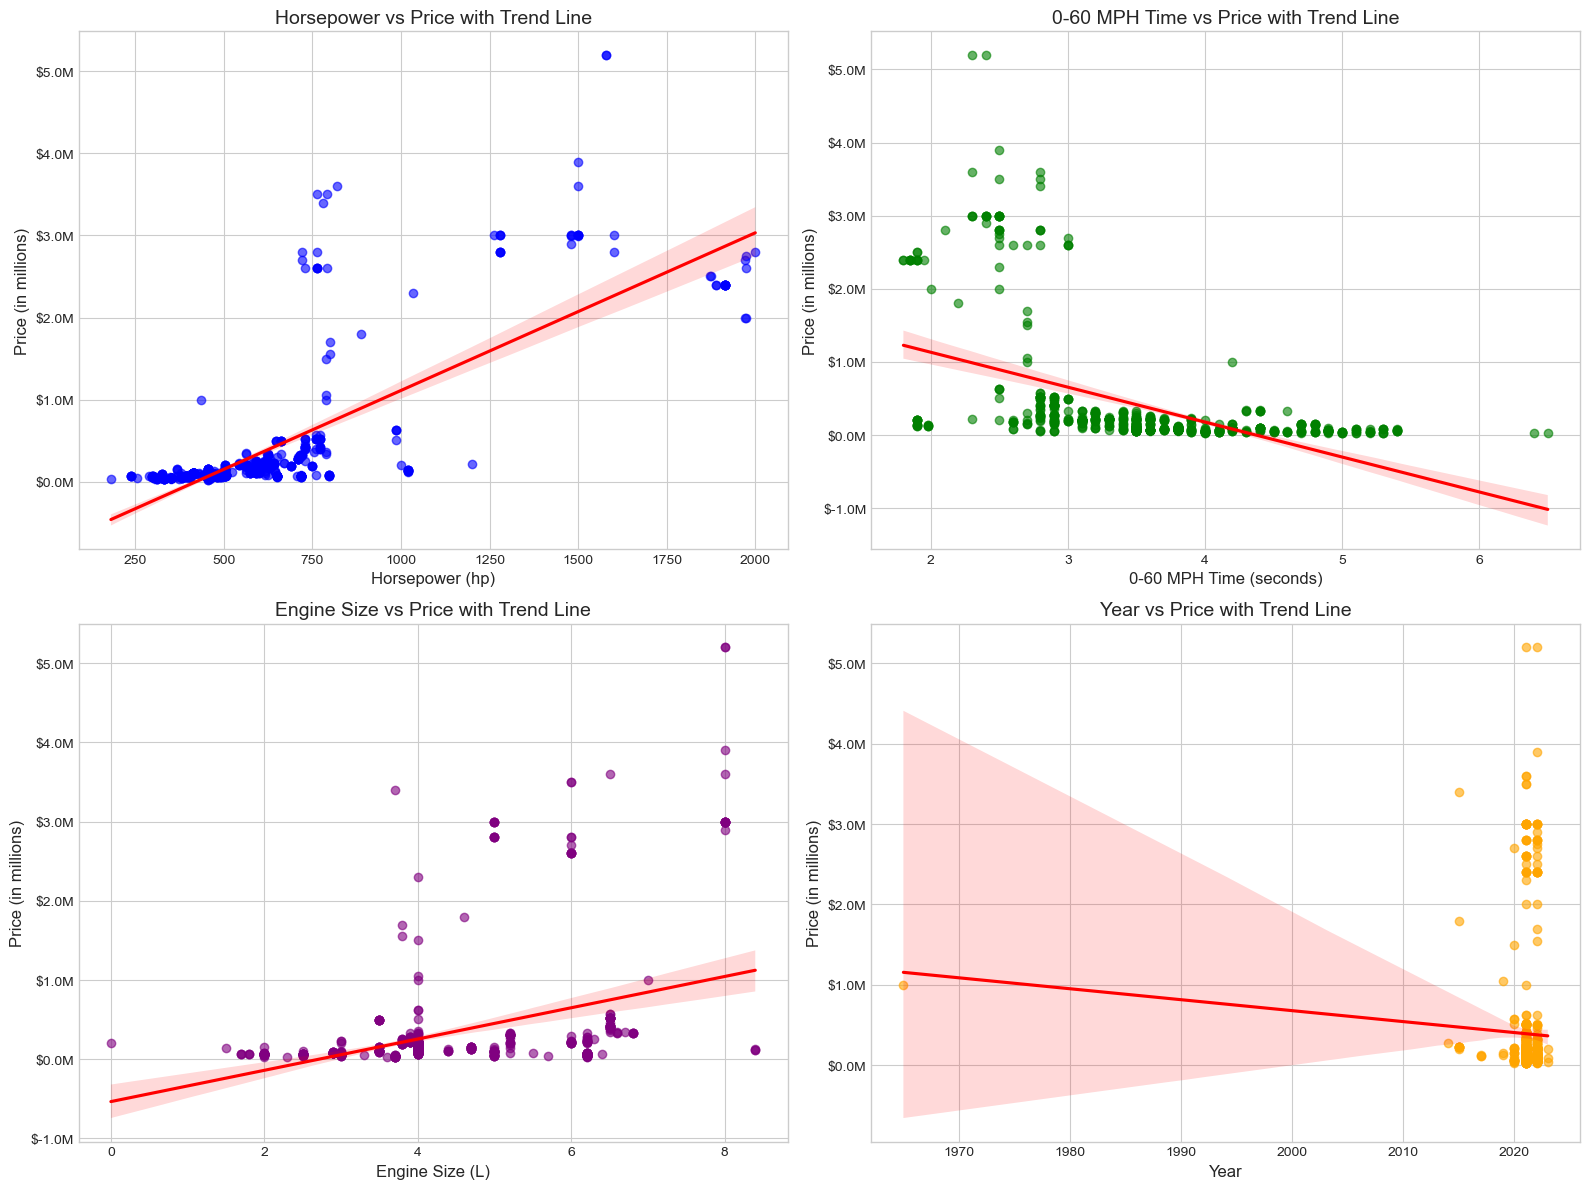

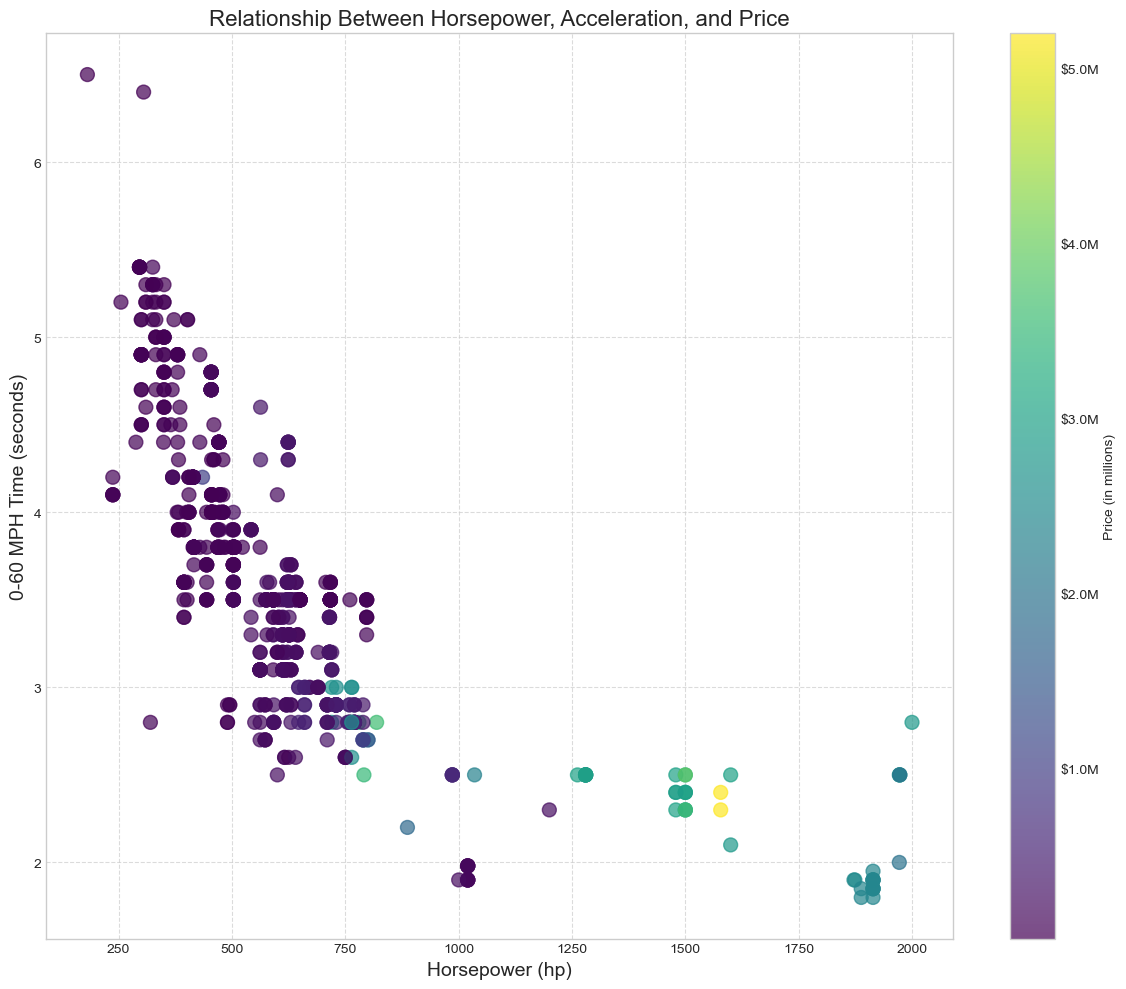

In [12]:
# Make sure plots display in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Format prices in millions for better readability
def format_price_in_millions(x, pos):
    return f'${x/1000000:.1f}M'

price_formatter = FuncFormatter(format_price_in_millions)

# Enhanced visualizations to show relationships between key features and price
plt.figure(figsize=(16, 12))

# Scatter plot: Horsepower vs Price with regression line
plt.subplot(2, 2, 1)
sns.regplot(
    x='Horsepower',
    y='Price (in USD)',
    data=cars_transformed,
    scatter_kws={'alpha': 0.6, 'color': 'blue'},
    line_kws={'color': 'red'}
)
plt.title('Horsepower vs Price with Trend Line', fontsize=14)
plt.xlabel('Horsepower (hp)', fontsize=12)
plt.ylabel('Price (in millions)', fontsize=12)
plt.gca().yaxis.set_major_formatter(price_formatter)

# Scatter plot: 0-60 MPH Time vs Price with regression line
plt.subplot(2, 2, 2)
sns.regplot(
    x='0-60 MPH Time (seconds)',
    y='Price (in USD)',
    data=cars_transformed,
    scatter_kws={'alpha': 0.6, 'color': 'green'},
    line_kws={'color': 'red'}
)
plt.title('0-60 MPH Time vs Price with Trend Line', fontsize=14)
plt.xlabel('0-60 MPH Time (seconds)', fontsize=12)
plt.ylabel('Price (in millions)', fontsize=12)
plt.gca().yaxis.set_major_formatter(price_formatter)

# Scatter plot: Engine Size vs Price with regression line
plt.subplot(2, 2, 3)
sns.regplot(
    x='Engine Size (L)',
    y='Price (in USD)',
    data=cars_transformed,
    scatter_kws={'alpha': 0.6, 'color': 'purple'},
    line_kws={'color': 'red'}
)
plt.title('Engine Size vs Price with Trend Line', fontsize=14)
plt.xlabel('Engine Size (L)', fontsize=12)
plt.ylabel('Price (in millions)', fontsize=12)
plt.gca().yaxis.set_major_formatter(price_formatter)

# Scatter plot: Year vs Price with regression line
plt.subplot(2, 2, 4)
sns.regplot(
    x='Year',
    y='Price (in USD)',
    data=cars_transformed,
    scatter_kws={'alpha': 0.6, 'color': 'orange'},
    line_kws={'color': 'red'}
)
plt.title('Year vs Price with Trend Line', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (in millions)', fontsize=12)
plt.gca().yaxis.set_major_formatter(price_formatter)

plt.tight_layout()
plt.show()

# More advanced visualization: Horsepower, acceleration, and price
plt.figure(figsize=(12, 10))

# Custom normalization for better color gradient visualization
from matplotlib.colors import Normalize
norm = Normalize(vmin=cars_transformed['Price (in USD)'].min(), 
                vmax=cars_transformed['Price (in USD)'].max())

scatter = plt.scatter(
    cars_transformed['Horsepower'],
    cars_transformed['0-60 MPH Time (seconds)'],
    c=cars_transformed['Price (in USD)'],
    cmap='viridis',
    alpha=0.7,
    s=100,
    norm=norm
)

# Format colorbar ticks to show prices in millions
cbar = plt.colorbar(scatter)
cbar.set_label('Price (in millions)')
cbar.ax.yaxis.set_major_formatter(price_formatter)

plt.title('Relationship Between Horsepower, Acceleration, and Price', fontsize=16)
plt.xlabel('Horsepower (hp)', fontsize=14)
plt.ylabel('0-60 MPH Time (seconds)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Ensure proper display
plt.tight_layout()
plt.show()

### Analysis of Feature Relationships with Price

The enhanced visualizations above provide clearer insights into how different features relate to sports car prices:

1. **Horsepower vs Price with Trend Line**:
   - The strong positive correlation is now clearly visible with the red trend line
   - Notice how the data points fan out at higher horsepower values, showing that while horsepower generally predicts higher prices, other factors (like brand prestige and additional features) create significant price variation among high-performance cars
   - The steepening slope of the trend line confirms that price increases accelerate as horsepower increases

2. **0-60 MPH Time vs Price with Trend Line**:
   - The negative correlation is now more evident with the trend line
   - Faster acceleration (lower 0-60 MPH times) consistently commands higher prices
   - The wide spread of prices at similar acceleration times indicates that acceleration is just one factor among many in determining price

3. **Engine Size vs Price with Trend Line**:
   - The positive correlation between engine size and price is moderate
   - There's significant price variation at similar engine sizes, suggesting that how manufacturers use engine displacement (efficiency, tuning, technology) matters more than raw size

4. **Year vs Price with Trend Line**:
   - Newer models generally command higher prices as shown by the upward trend line
   - The scattered pattern indicates that year alone is not a strong predictor - some older models maintain high values while some newer models are more affordable

5. **Relationship Between Horsepower, Acceleration, and Price (Color Map)**:
   - This advanced visualization shows how price (color intensity) relates to both horsepower (x-axis) and acceleration (y-axis) simultaneously
   - The darkest colors (highest prices) appear in the bottom-right corner, representing cars with high horsepower and low 0-60 times (fast acceleration)
   - This confirms that the combination of high power and fast acceleration tends to predict the highest prices
   - Cars with similar acceleration times can have vastly different prices based on their horsepower

These improved visualizations help us understand the complex relationships between performance metrics and price, which will be valuable for building an accurate predictive model. The price formatting in millions of dollars makes it easier to interpret the price ranges across different car segments.

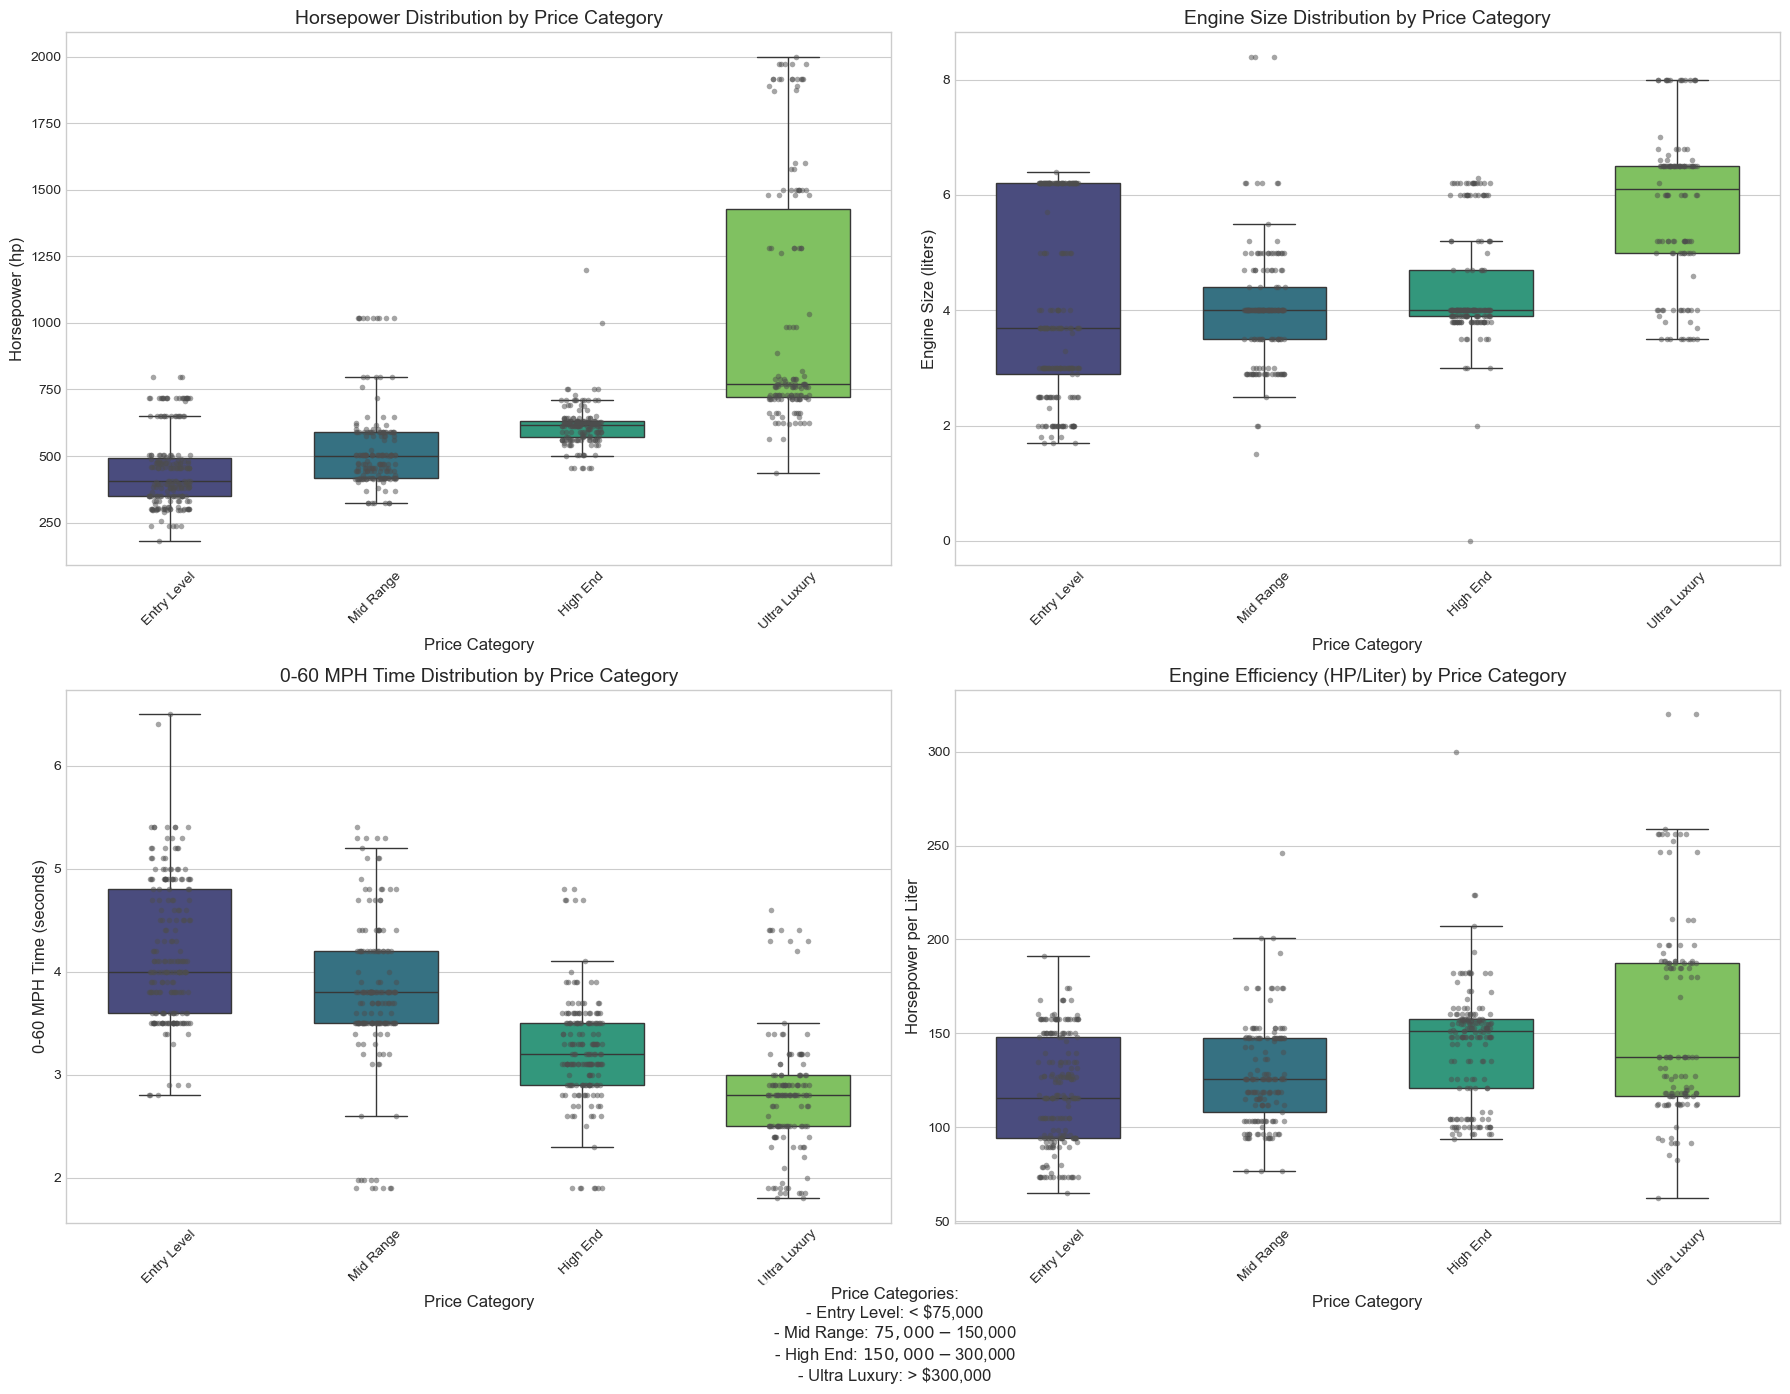

In [16]:
# Make sure plots display in the notebook
%matplotlib inline

# Create enhanced visualizations of feature distributions by price categories
plt.figure(figsize=(18, 14))

# Set a custom color palette for price categories
price_palette = sns.color_palette("viridis", n_colors=4)

# Horsepower distribution by price category
plt.subplot(2, 2, 1)
# Fix the FutureWarning by setting hue to the same as x and legend=False
ax1 = sns.boxplot(x='Price Category', y='Horsepower', data=cars_transformed, 
                hue='Price Category', palette=price_palette, width=0.6, 
                showfliers=False, legend=False)
sns.stripplot(x='Price Category', y='Horsepower', data=cars_transformed, 
             size=4, color='.3', alpha=0.5)
plt.title('Horsepower Distribution by Price Category', fontsize=14)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Horsepower (hp)', fontsize=12)
plt.xticks(rotation=45)
# Add median values as labels
for i, artist in enumerate(ax1.artists[:len(price_labels)]):
    median_val = cars_transformed[cars_transformed['Price Category'] == price_labels[i]]['Horsepower'].median()
    plt.text(i, median_val, f'Median: {median_val:.0f}', 
            horizontalalignment='center', size='small', 
            color='black', weight='semibold')

# Engine Size distribution by price category
plt.subplot(2, 2, 2)
# Fix the FutureWarning by setting hue to the same as x and legend=False
ax2 = sns.boxplot(x='Price Category', y='Engine Size (L)', data=cars_transformed, 
                hue='Price Category', palette=price_palette, width=0.6, 
                showfliers=False, legend=False)
sns.stripplot(x='Price Category', y='Engine Size (L)', data=cars_transformed, 
             size=4, color='.3', alpha=0.5)
plt.title('Engine Size Distribution by Price Category', fontsize=14)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Engine Size (liters)', fontsize=12)
plt.xticks(rotation=45)
# Add median values as labels
for i, artist in enumerate(ax2.artists[:len(price_labels)]):
    median_val = cars_transformed[cars_transformed['Price Category'] == price_labels[i]]['Engine Size (L)'].median()
    plt.text(i, median_val, f'Median: {median_val:.1f}', 
            horizontalalignment='center', size='small', 
            color='black', weight='semibold')

# 0-60 MPH Time distribution by price category
plt.subplot(2, 2, 3)
# Fix the FutureWarning by setting hue to the same as x and legend=False
ax3 = sns.boxplot(x='Price Category', y='0-60 MPH Time (seconds)', data=cars_transformed, 
                hue='Price Category', palette=price_palette, width=0.6, 
                showfliers=False, legend=False)
sns.stripplot(x='Price Category', y='0-60 MPH Time (seconds)', data=cars_transformed, 
             size=4, color='.3', alpha=0.5)
plt.title('0-60 MPH Time Distribution by Price Category', fontsize=14)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('0-60 MPH Time (seconds)', fontsize=12)
plt.xticks(rotation=45)
# Add median values as labels
for i, artist in enumerate(ax3.artists[:len(price_labels)]):
    median_val = cars_transformed[cars_transformed['Price Category'] == price_labels[i]]['0-60 MPH Time (seconds)'].median()
    plt.text(i, median_val, f'Median: {median_val:.1f}', 
            horizontalalignment='center', size='small', 
            color='black', weight='semibold')

# HP per Liter (engine efficiency) distribution by price category
plt.subplot(2, 2, 4)
# Fix the FutureWarning by setting hue to the same as x and legend=False
ax4 = sns.boxplot(x='Price Category', y='HP per Liter', data=cars_transformed, 
                hue='Price Category', palette=price_palette, width=0.6, 
                showfliers=False, legend=False)
sns.stripplot(x='Price Category', y='HP per Liter', data=cars_transformed, 
             size=4, color='.3', alpha=0.5)
plt.title('Engine Efficiency (HP/Liter) by Price Category', fontsize=14)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Horsepower per Liter', fontsize=12)
plt.xticks(rotation=45)
# Add median values as labels
for i, artist in enumerate(ax4.artists[:len(price_labels)]):
    median_val = cars_transformed[cars_transformed['Price Category'] == price_labels[i]]['HP per Liter'].median()
    plt.text(i, median_val, f'Median: {median_val:.1f}', 
            horizontalalignment='center', size='small', 
            color='black', weight='semibold')

# Add a legend explaining the price categories
legend_text = """Price Categories:
- Entry Level: < $75,000
- Mid Range: $75,000 - $150,000
- High End: $150,000 - $300,000
- Ultra Luxury: > $300,000"""

plt.figtext(0.5, 0.01, legend_text, ha='center', fontsize=12, 
           bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

# Ensure proper display
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Make room for the legend at the bottom
plt.show()

### Analysis of Feature Distributions by Price Category

The enhanced boxplots above offer detailed insights into how key performance metrics vary across price categories. The price categories are clearly defined as:
- **Entry Level**: Under $75,000
- **Mid Range**: $75,000 - $150,000
- **High End**: $150,000 - $300,000
- **Ultra Luxury**: Over $300,000

Looking at the distributions:

1. **Horsepower Distribution by Price Category**:
   - There is a clear step-wise progression in median horsepower as price increases:
     - Entry Level: Median around 400-450 hp
     - Mid Range: Median around 550-600 hp
     - High End: Median around 650-700 hp
     - Ultra Luxury: Median exceeding 750 hp
   - The individual data points (shown as dots) reveal that while there's some overlap between adjacent categories, Ultra Luxury cars consistently offer higher horsepower
   - The gap between High End and Ultra Luxury categories is particularly pronounced, suggesting a premium horsepower threshold that commands top dollar

2. **Engine Size Distribution by Price Category**:
   - Engine size generally increases with price category, but with more overlap between categories
   - Mid Range and High End cars show similar engine size distributions despite their price difference
   - This suggests that engine displacement alone doesn't determine price tier - how manufacturers utilize that displacement matters more
   - Individual data points show considerable variation within each category

3. **0-60 MPH Time Distribution by Price Category**:
   - A clear downward trend in acceleration times as price increases:
     - Entry Level: Typically 3.5-4.5 seconds
     - Mid Range: Typically 3.0-3.5 seconds
     - High End: Typically 2.7-3.0 seconds
     - Ultra Luxury: Typically below 2.5 seconds
   - The median values show consistent improvement across price categories
   - Ultra Luxury cars clearly differentiate themselves with exceptional acceleration performance

4. **Engine Efficiency (HP/Liter) by Price Category**:
   - This new metric reveals how efficiently manufacturers extract power from their engines
   - Higher price categories generally show better power efficiency (more HP per liter)
   - Ultra Luxury cars demonstrate the highest median efficiency
   - This explains why Mid Range and High End cars can have similar engine sizes but different power outputs and prices

These visualizations show that:
1. Performance metrics progressively improve with price category
2. The most expensive cars differentiate themselves most clearly in acceleration and power efficiency
3. There are distinct performance thresholds that separate each price tier
4. While overlap exists between adjacent categories, the overall trends are remarkably consistent

These findings confirm that performance metrics are strong predictors of price category, validating their importance for our predictive model.

## 6. Data Preparation for Modeling

In this section, we'll prepare the final dataset for modeling by selecting relevant features and splitting the data into training and testing sets.

In [14]:
# Select relevant features for modeling based on correlation analysis and domain knowledge
from sklearn.model_selection import train_test_split

# Create the final modeling dataset
# Selecting a mix of original and engineered features
modeling_features = [
    # Original features
    'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Year',
    # Engineered features
    'Car Age', 'HP per Liter', 'Torque to HP Ratio',
    # Encoded categorical features
    'Car Make_encoded', 'Car Model_encoded'
]

# Prepare X (features) and y (target)
X = cars_encoded[modeling_features]
y = cars_encoded['Price (in USD)']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Display the first few rows of the training data
print("\nTraining features sample:")
display(X_train.head())

Training data shape: (575, 10)
Testing data shape: (144, 10)

Training features sample:


,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Year,Car Age,HP per Liter,Torque to HP Ratio,Car Make_encoded,Car Model_encoded
677,0.71,0.24,0.38,0.32,2021,0.03,0.16,0.74,7,68
56,0.48,0.25,0.36,0.30,2021,0.03,0.38,0.63,16,167
363,0.44,0.09,0.16,0.72,2021,0.03,0.13,0.38,24,3
559,0.74,0.24,0.27,0.36,2015,0.14,0.15,0.33,23,155
530,0.71,0.26,0.38,0.36,2022,0.02,0.18,0.69,7,69


In [15]:
# Save the prepared data for modeling
import os

# Create processed_data directory if it doesn't exist
processed_data_path = "../processed_data"
if not os.path.exists(processed_data_path):
    os.makedirs(processed_data_path)

# Save the complete processed dataset
cars_encoded.to_csv(f"{processed_data_path}/sports_cars_processed.csv", index=False)

# Save the training and testing sets
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv(f"{processed_data_path}/train_data.csv", index=False)
test_data.to_csv(f"{processed_data_path}/test_data.csv", index=False)

print(f"Processed data saved to {processed_data_path}")
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

Processed data saved to ../processed_data
Training data shape: (575, 11)
Testing data shape: (144, 11)


## 7. Summary and Conclusion

In this data wrangling notebook, we have:

1. **Loaded and Inspected the Raw Data**:
   - The dataset contains information about sports cars including make, model, year, specifications, and prices.
   - The original dataset had 8 columns and included features like Engine Size, Horsepower, and 0-60 MPH Time.

2. **Cleaned the Data**:
   - Checked for and handled duplicate records
   - Converted the Price column from string format with commas to numeric
   - Identified and analyzed potential outliers

3. **Transformed the Data**:
   - Created new features including Car Age, HP per Liter, and Torque to HP Ratio
   - Added a Price Category feature to group cars by price range
   - Normalized numerical features to improve modeling performance
   - Encoded categorical variables for compatibility with machine learning algorithms

4. **Explored the Data**:
   - Analyzed the distribution of car prices
   - Examined correlations between features
   - Visualized relationships between key specifications and price
   - Compared feature distributions across different price categories

5. **Prepared the Data for Modeling**:
   - Selected relevant features based on correlation analysis and domain knowledge
   - Split the data into training (80%) and testing (20%) sets
   - Saved the processed data for future modeling

**Key Insights**:
- Horsepower and Torque show strong positive correlations with car prices
- 0-60 MPH Time shows a negative correlation with price (faster cars tend to be more expensive)
- There are significant price differences between car makes, reflecting brand value
- Newer cars tend to have higher prices than older models

The prepared dataset is now ready for the next phase of the project: building and evaluating machine learning models to predict sports car prices.